In [1]:
import sys
sys.path.append("../")

import datarun

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

In [3]:
data = datarun.Experiment(
    datapath="../data/mar30/linewidth/",
    idx_start=32,
    vstart=.3,
    vend=1.0,
    vstep=.175,
    numtrials=25,
    mask=.1
)

on 0:                                                                           
on 45:                                                                          
on 46: array must not contain infs or NaNs                                      
on 52:                                                                          
on 60:                                                                          
on 70:                                                                          
on 89:                                                                          
on 100:                                                                         
on 110:                                                                         
on 120:                                                                         
|████████████████████████████████████████| 125/125 [100%] in 2:54.3 (0.71/s)    


In [194]:
def od_max(run):
    return run.popt_x[0]

str_dat = data.structure_data(od_max)

In [195]:
for dat in str_dat.values():
    mean = np.mean(dat)
    std = np.std(dat)
    for val in dat:
        if np.abs(val - mean) > 2*std:
            dat.remove(val)
            print("removed")

removed
removed
removed


In [431]:
def lorentzian(x, A, w0, gamma):
    return A*(gamma/(2*np.pi))/((x-w0)**2+(gamma/2)**2)

def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def voigt(x, A, mu, gamma):
    return A*voigt_profile(x-mu, .53, gamma)

In [432]:
xdata = 59.25+np.array(data.vlist)*6.1*2

In [433]:
means = np.fromiter(map(np.mean, str_dat.values()), float)
errs = np.fromiter(map(np.std, str_dat.values()), float)/5
popt_g, pcov_g = curve_fit(gaussian, xdata, means, sigma = errs, p0 = [70, 65, 8], absolute_sigma=True)
popt_l, pcov_l = curve_fit(lorentzian, xdata, means, sigma = errs, p0 = [20, 65, 8], absolute_sigma=True)
popt_v, pcov_v = curve_fit(voigt, xdata, means, sigma = errs, p0 = [692, 6.7,  3],absolute_sigma=True)

In [434]:
popt_v

array([691.9405653 ,  67.39903638,   2.97811644])

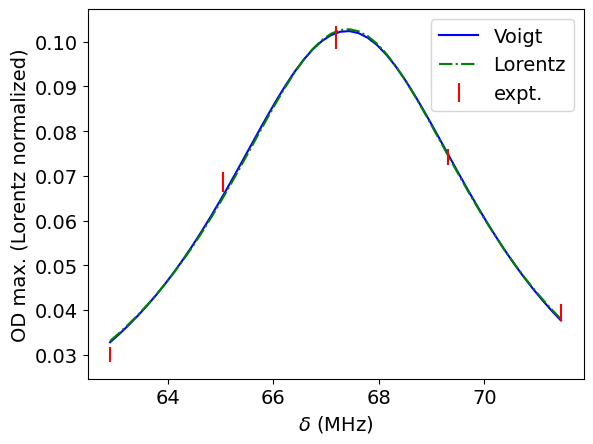

In [435]:
xax = np.linspace(min(xdata), max(xdata))
plt.plot(xax, voigt(xax, *popt_v)/popt_l[0], color = "b", label = "Voigt")
plt.plot(xax, lorentzian(xax, *popt_l)/popt_l[0], linestyle = "-.", color = "g", label = "Lorentz")
plt.errorbar(xdata, means/popt_l[0], linestyle = "None", yerr = errs/popt_l[0], color = 'r', label = "expt.")
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\delta$ (MHz)", fontsize = 14)
plt.ylabel(r"OD max. (Lorentz normalized)", fontsize = 14)
plt.savefig("../figures/linewidth.png", dpi = 200)


In [436]:
sum((voigt(xdata, *popt_v)-means)**2/errs**2)/2

2.925394052520873

In [442]:
popt_l

array([701.26374592,  67.40532799,   6.19209192])

In [440]:
popt_l[2]*2

12.384183833307768

In [441]:
np.sqrt(pcov_l[2][2])

0.2035984431637244

In [396]:
.535

0.535